# TECHINCAL TREND CRAWLING CODE FOR CGBIO 
# 시지바이오 주요기사 크롤링 코드
## 1. CRAWLING (Article in Naver/네이버뉴스기사, Google Scholar publications/구글 스칼라 논문검색)
* 1.1 Summarize the google scholar publications/구글 스칼라 논문 정리 (Recent 최신순, Citation 인용순)
* 1.2 

<br>

## 2. Summarize the data and setting the framework / 데이터 정리 및 프레임 설정
* 2.1 Remove the outlier and set the number of data / 데이터 보여줄 개수 및 이상치 제외
* 2.2 Merge Data: Integrate into structured framework /  데이터 통합: 각 데이터를 정형화된 틀로 통합(DB화)

<br>

[KEYWORD FOR RESEARCH TEAM NUMBER 6]  
* Below keywords are seperated with comma
* 기술 Techincal keywords : hemocompatible coating, Very late thrombosis, thin strut, Scaffold coverage, PCI, Compliance, Scaffold
* 제품 Product keywords : Bioresorbable Vascular Stent, Poly L-lacticacid, OTW Balloon, suction catheter, delivery system, Balloon catheterDES, DEB
* 기타 ETC : AI medical device


In [ ]:
import sys
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Start new session
session = requests.Session()

# Variables
number_of_results = 100 # number of results to look for on Google Scholar
save_database = True # choose if you would like to save the database to .csv
keyword = 'Bioresorbable Vascular Stent'
path = './'+keyword+'_result_cgbio.csv' # path to save the data

links = list()
title = list()
citations = list()
year = list()
rank = list()
author = list()
rank.append(0) # initialization necessary for incremental purposes

In [ ]:
# functions
def get_citations(content):
    out = 0
    for char in range(0,len(content)):
        if content[char:char+9] == 'Cited by ':
            init = char+9                          
            for end in range(init+1,init+6):
                if content[end] == '<':
                    break
            out = content[init:end]
    return int(out)
    
def get_year(content):
    for char in range(0,len(content)):
        if content[char] == '-':
            out = content[char-5:char-1]
    if not out.isdigit():
        out = 0
    return int(out)

def get_author(content):
    for char in range(0,len(content)):
        if content[char] == '-':
            out = content[2:char-1]
            break
    return out

## Avoiding bot detection by Google

### Proxies
The main method here is to use _proxies_ from https://freeproxylists.net/ \
These sometimes don't work and are not very reliable, here are some better solutions I found:

- [Selenium](https://towardsdatascience.com/web-scraping-using-selenium-python-8a60f4cf40ab): this makes it easier to scrape data and can also use cookies, browser GUI etc (not easy to use on Colab or on headless servers though) to avoid detection
- [Scrapy](https://scrapy.org/) another good library for scraping, but there is need for some `API_KEY` (I think for the proxies that need to be paid)
- [SerpApi](https://serpapi.com/) probably most comprehensive solution, but of course payment is needed here

So, cheap solutions seem free proxy servers and/or `selenium` if we can make them work. If Daewoong has some servers to use as proxy, perhaps we could use them


### Other methods

Here are some ideas [[Stackoverflow]](https://stackoverflow.com/questions/60535351/web-scraping-google-search-results/60536180#60536180)

- We can start by implementing a time randomizer (drawing values from a uniform distribution)


In [ ]:
import time
import numpy as np
from tqdm import tqdm

timeout = 5 # proxy timeout

# List from website, we could also scrape these addresses from there based on rankings and then use them
proxy_list = [{'https': 'https://182.253.82.155:37242'},
              {'https': 'https://139.99.74.79:8080'},
              {'https': 'https://164.163.238.67:3128'},
              {'https': 'https://178.63.17.151:3128'},
              {'https': 'https://34.85.1.59:3128'},
              {'https': 'https://135.148.33.51:8080'}]


# Randomize time with a uniform distribution, we should adjust the times depending on the detection rate
def random_time(low=1.0, high=4.0):
  return np.random.uniform(low=1.0, high=4.0, size=None)

for n in tqdm(range(0, number_of_results, 10)):    
    url = 'https://scholar.google.com/scholar?start='+str(n)+'&q='+keyword.replace(' ','+')

    for proxy in proxy_list:
      try:
        page = session.get(url, proxies=proxy, timeout=timeout) # use proxy to avoid detection
      except:
        # Not working proxy becomes last in the list, so we don't retry it
        proxy_list.append(proxy_list.pop(proxy_list.index(proxy)))
        continue
      else:
        # Working proxy becomes first in the list, so we retry it first at the next iteration
        proxy_list.insert(0, proxy_list.pop(proxy_list.index(proxy)))
    
    c = page.content
    
    # Create parser
    soup = BeautifulSoup(c, 'html.parser')

    # Get stuff
    mydivs = soup.findAll("div", { "class" : "gs_r" })
    
    for div in mydivs:
        
        try:
            links.append(div.find('h3').find('a').get('href'))
        except Exception as e: # catch *all* exceptions
            links.append('no link')
            continue

        try:
            title.append(div.find('h3').find('a').text)
        except: 
            title.append('Could not catch title')
            
        citations.append(get_citations(str(div.format_string)))
        year.append(get_year(div.find('div',{'class' : 'gs_a'}).text))
        author.append(get_author(div.find('div',{'class' : 'gs_a'}).text))
        rank.append(rank[-1]+1)
    
    # Randomize time between requests
    time.sleep(random_time())

print(len(links), len(title), len(citations), len(year), len(author))

100%|██████████| 10/10 [01:28<00:00,  8.89s/it]

55 50 50 50 50


In [ ]:
# The ordering gives an idea of which server is working
print('Proxy list:\n', proxy_list)

Proxy list:
 [{'https': 'https://139.99.74.79:8080'}, {'https': 'https://164.163.238.67:3128'}, {'https': 'https://182.253.82.155:37242'}, {'https': 'https://178.63.17.151:3128'}, {'https': 'https://34.85.1.59:3128'}, {'https': 'https://135.148.33.51:8080'}]


                                                 Author  ...                                             Source
Rank                                                     ...                                                   
27                     Ellis, DJ Kereiakes, DC Metzger…  ...  https://onlinelibrary.wiley.com/doi/abs/10.100...
47        Capodanno, T Gori, H Nef, A Latib, J Mehilli…  ...  https://www.jacc.org/doi/abs/10.1016/j.jcin.20...
2     Cassese, RA Byrne, G Ndrepepa, S Kufner, J Wiebe…  ...  https://www.sciencedirect.com/science/article/...
4              Gao, Y Yang, Y Han, Y Huo, J Chen, B Yu…  ...  https://www.jacc.org/doi/abs/10.1016/j.jacc.20...
3          Puricel, D Arroyo, N Corpataux, G Baeriswyl…  ...  https://www.jacc.org/doi/abs/10.1016/j.jacc.20...
16                         Dudek, Y Onuma, JA Ormiston…  ...  https://www.ncbi.nlm.nih.gov/pmc/articles/pmc6...
5        Brugaletta, T Gori, AF Low, P Tousek, E Pinar…  ...  https://www.jacc.org/doi/abs/10.1016/j.jci

Text(0.5, 1.0, 'Keyword: Bioresorbable Vascular Stent')

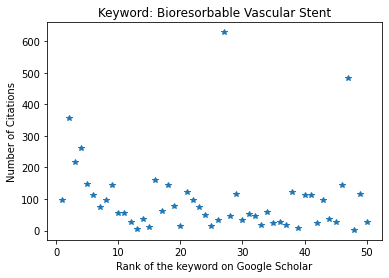

In [ ]:
# Create a dataset and sort by the number of citations
data = pd.DataFrame(zip(author, title, citations, year, links), index = rank[1:], 
                    columns=['Author', 'Title', 'Citations', 'Year', 'Source'])
data.index.name = 'Rank'

data_ranked = data.sort_values('Citations', ascending=False)
print(data_ranked)

# Plot by citation number
plt.plot(rank[1:],citations,'*')
plt.ylabel('Number of Citations')
plt.xlabel('Rank of the keyword on Google Scholar')
plt.title('Keyword: '+keyword)

## Comments
The scraper kinda works :) 

But depending on the server (which may get blocked) we obtain different number of results... For example, I obtained >500 in a run, and now ~50 

Assuming we don't want to pay a proxy service or so, we could do the following:
1. Obtain page data through working proxy server
2. (prelimary) Scrape the webpage
3. If the webpage contains some keywords saying like "check if you are a robot" or so, then we change the proxy server and restart from point 1
4. Scrape for important data 
5. Save and connect to database and the next steps

In [ ]:
# Save results
if save_database:
    data_ranked.to_csv(path, encoding='utf-8-sig') # Change the path

---
## [Extra] Other random code

In [ ]:
assert False, "Extra code ahead not to run by default :)"

AssertionError: ignored

In [ ]:
from bs4 import BeautifulSoup
import requests, lxml, os

headers = {
    'User-agent':
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.102 Safari/537.36 Edge/18.19582"
}

proxies = {
  'http': os.getenv('HTTP_PROXY')
}

html = requests.get('https://scholar.google.com/citations?view_op=view_org&hl=en&org=9834965952280547731', headers=headers, proxies=proxies).text
soup = BeautifulSoup(html, 'lxml')

# Selecting container where all data located 
for result in soup.select('.gs_ai_chpr'):
  name = result.select_one('.gs_ai_name a').text
  link = result.select_one('.gs_ai_name a')['href']
  # https://stackoverflow.com/a/6633693/15164646
  id = link
  id_identifer = 'user='
  before_keyword, keyword, after_keyword = id.partition(id_identifer)
  author_id = after_keyword
  affiliations = result.select_one('.gs_ai_aff').text
  email = result.select_one('.gs_ai_eml').text
  try:
    interests = result.select_one('.gs_ai_one_int').text
  except:
    interests = None
  # "Cited by 107390" = getting text string -> splitting by a space -> ['Cited', 'by', '21180'] and taking [2] index which is the number.
  cited_by = result.select_one('.gs_ai_cby').text.split(' ')[2] 

  print(f'{name}\nhttps://scholar.google.com{link}\n{author_id}\n{affiliations}\n{email}\n{interests}\n{cited_by}\n')

In [ ]:
# # install chromium, its driver, and selenium
# !apt update
# !apt install chromium-chromedriver
# !pip install selenium
# # set options to be headless, ..
# from selenium import webdriver
# options = webdriver.ChromeOptions()
# options.add_argument('--headless')
# options.add_argument('--no-sandbox')
# options.add_argument('--disable-dev-shm-usage')
# # open it, go to a website, and get results
# wd = webdriver.Chrome(options=options)
# wd.get("https://www.website.com")
# print(wd.page_source)  # results
# # divs = wd.find_elements_by_css_selector('div')


In [ ]:

# # This script is a starting point and probably won't work inside replit.com

# from selenium import webdriver
# from selenium.webdriver.chrome.options import Options
# from selenium.webdriver.support.ui import WebDriverWait
# from selenium.webdriver.support import expected_conditions as EC
# from selenium.webdriver.support.expected_conditions import presence_of_element_located
# from selenium.webdriver.common.by import By

# options = Options()
# options.page_load_strategy = 'normal'
# driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
# wait = WebDriverWait(driver, 10)

# # Proxy is needed: 
# # https://www.selenium.dev/documentation/en/webdriver/http_proxies
# # https://stackoverflow.com/a/40628176/15164646

# query = "samsung"

# driver.get(f'https://scholar.google.com.ua/scholar?hl=en&as_sdt=0%2C5&as_vis=1&q={query}')
# cite = wait.until(presence_of_element_located(By.XPATH, '//*[@id="gs_res_ccl_mid"]/div[1]/div[2]/div[3]/a[2]')).click

# container = driver.find_element_by_css_selector('#gs_citt').text
# print(container)


# # Proxy method. Still throws a CAPTCHA
# PROXY = "HOST:PORT"
# webdriver.DesiredCapabilities.CHROME['proxy'] = {
#     "httpProxy": PROXY,
#     "proxyType": "MANUAL",
# }

# with webdriver.Chrome() as driver:
#     wait = WebDriverWait(driver, 10)

#     query = "samsung"
#     driver.get('https://scholar.google.com.ua/scholar?hl=en&as_sdt=0%2C5&as_vis=1&q=samsung')
#     cite = wait.until(EC.element_to_be_clickable(By.XPATH, "//*[@id='gs_res_ccl_mid']/div[1]/div[2]/div[3]/a[2]")).click

#     container = driver.find_element_by_css_selector('#gs_citt').text
#     print(container)